# Programação Genética

**Pós Graduação em Inteligência Artificial - IFMG**

**Autor**: Alexandre Fortes Santana
**Professor**: Carlos Alexandre

**Implementação de operadores de mutação e crossover customizados para um problema específico.**

*Return to Basics*: Devido à falta de tempo disponível, este trabalho de programação genética tem como foco a aplicação dos fundamentos, e não necessariamente a resolução de um problema real. Para abordar um problema real de forma consistente, é essencial dedicar uma quantidade significativa de tempo para entender profundamente o problema antes de aplicar qualquer solução. Portanto, escolhi um problema que permita a aplicação dos conceitos em um curto período de tempo, com o objetivo de aprender os fundamentos de maneira eficaz.

### Conceitos Fundamentais dos Algoritmos Genéticos e Programação Genética

A programação genética é um tipo de algoritmo evolutivo para otimização global que se concentra na geração e evolução de programas de computador. Ele gera soluções candidatas (programas), avalia sua aptidão (fitness) e seleciona os melhores para a próxima geração. O processo é repetido até encontrar um programa que forneça uma solução satisfatória para o problema em questão. A aptidão mede o desempenho do programa. A programação genética, como outros algoritmos genéticos, é estocástica, utilizando elementos aleatórios para explorar diferentes programas e obter resultados melhores do que algoritmos determinísticos.

### Referência

- Jason Brownlee, Simple Genetic Algorithm From Scratch in Python, Machine Learning Mastery, disponível em  https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/, acessado em 11 de julho, 2023.
- Tutorial sobre Programação Genética - o que é e para que serve, disponível em https://www.youtube.com/watch?v=beqx5ZLhNTY, acessado em 11 de julho, 2023.

# Problema a ser resolvido

Consideramos a função `f(x) = abs(math.sin(math.sqrt(abs(x))))*x+1`, onde `x` é um número decimal fracionário que representa um indivíduo e é obtido pela conversão de um número binário (genótipo) para decimal. O objetivo é encontrar possíveis valores de x que maximizem o resultado da função, até um dado `limite`.

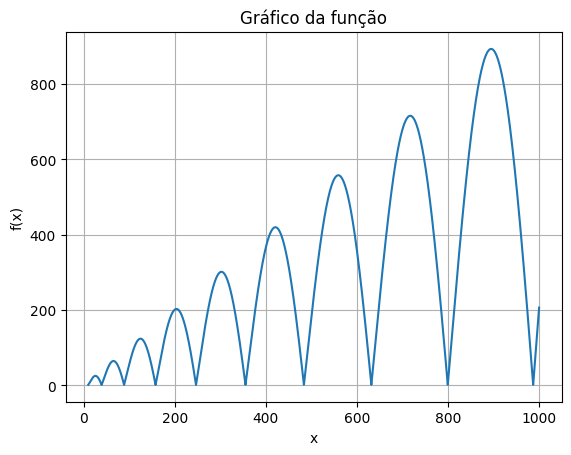

In [2]:
# Função a ser otimizada
import math
import numpy as np
import matplotlib.pyplot as plt

def equacao(x):
    return abs(math.sin(math.sqrt(abs(x))))*x+1

# Intervalo de valores de x
x = np.linspace(10, 1000, 10000)

# Calcula os valores correspondentes de y
y = [equacao(val) for val in x]

# Plotagem da função
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da função')
plt.grid(True)

### Visão geral do algoritmo:

- Gerar, aleatoriamente, um conjunto inicial de indivíduos.
- Criar pares de indivíduos para gerar novos indivíduos.
- Realizar mutações aleatórias nos novos indivíduos gerados.
- Substituir o conjunto anterior pelos novos indivíduos gerados.
- Continuar o processo até encontrar uma solução adequada, preferencialmente, antes de chegar ao fim do máximo de gerações.

### Fitness

Vamos construir os códigos para decodificação do genótipo e avaliação do fitness, definido pela função:

`f(x) = abs(math.sin(math.sqrt(abs(x))))*x+1`

1. `BinarioParaDecimal`: Esta classe tem uma função chamada `decode` que converte uma string binária em um número decimal. Ela faz isso dividindo a string binária em duas partes: a parte inteira e a parte fracionária (se houver), e converte cada uma delas em uma representação decimal. Além disso, a função aplica uma determinada função f(x) sobre o valor decimal, retornando este valor como fitness.

2. `FitnessEvaluator`: Esta classe tem uma função chamada `evaluate` que recebe uma string binária (chamada `genotype`), a converte em um número decimal usando a classe `BinarioParaDecimal` e depois avalia o 'fitness' do indivíduo. O valor de 'fitness' é o próprio valor decodificado se estiver no intervalo [5, 500], caso contrário, o fitness é 0.

In [22]:
# O método "decode" converte uma string binária em um número inteiro. 
# O método "FitnessEvaluator" retorna o valor de f(x)
import math

class BinarioParaDecimal:
    
    def decode(self, genotype):

        partes = str(genotype).split('.')  # Divide o número binário em parte inteira e parte fracionária
        parte_inteira = int(partes[0], 2)  # Converte a parte inteira binária em decimal
        parte_fracionaria = 0.0
        if len(partes) == 2:  # Se houver parte fracionária
            for i in range(len(partes[1])):
                digito = int(partes[1][i])  # Obtém cada dígito da parte fracionária
                parte_fracionaria += digito * (2 ** -(i+1))  # Converte cada dígito em decimal fracionado
        decimal_number = parte_inteira + parte_fracionaria
        fitness = abs(math.sin(math.sqrt(abs(decimal_number))))*decimal_number+1 # aplica f(x)
        return fitness
    
class FitnessEvaluator:
    
    def __init__(self):
        self.binario_para_decimal = BinarioParaDecimal()
        
    def evaluate(self, genotype):
        decoded_value = self.binario_para_decimal.decode(genotype)  # Decodifica o genótipo
        # Calcula o fitness. No caso, escolhemos um valor mínimo e máximo para este exercício
        if decoded_value >= 5 and decoded_value <= 500:
            return decoded_value
        else:
            return 0

In [40]:
# Teste

def decimal_fracionado_para_binario(decimal):
    parte_inteira = int(decimal)
    parte_fracionaria = decimal - parte_inteira

    binario_inteiro = bin(parte_inteira)[2:]  # Converte a parte inteira para binário removendo o prefixo '0b'
    binario_fracionario = ""

    while parte_fracionaria != 0:
        parte_fracionaria *= 2
        bit = int(parte_fracionaria)
        binario_fracionario += str(bit)
        parte_fracionaria -= bit

    binario = binario_inteiro + "." + binario_fracionario

    return binario


# Criando uma instância do avaliador de aptidão (fitness evaluator) e passando o decodificador como argumento
evaluator = FitnessEvaluator()

# Validando equação vs classes
decimal = 255.1
equacaopura=equacao(decimal)
print("Equação pura: ",equacaopura)

# Genótipo a ser avaliado
genotype = decimal_fracionado_para_binario(decimal)

# Avaliando o genótipo utilizando o avaliador de aptidão
result = evaluator.evaluate(genotype)

# Exibindo o resultado
print("Fitness:", result)
if result==equacaopura:
    print("( ͡° ͜ʖ ͡°)")

Equação pura:  67.538990266594
Fitness: 67.538990266594
( ͡° ͜ʖ ͡°)


### Indivíduos

A classe `Individual` representa um indivíduo em uma população. Cada indivíduo possui um genótipo (sua representação genética ou solução candidata para o problema em questão) e uma medida de fitness (a avaliação de quão boa é a solução candidata).

1. `__init__`: Este é o construtor da classe. Ele toma um `genotype` e um valor `fitness` como argumentos e os atribui aos atributos correspondentes do objeto.

2. `__repr__`: Representação em string do objeto. Ele é chamado quando você usa a função `print` ou `str` em um objeto `Individual`. Aqui, ele retorna uma string que mostra o genótipo e a aptidão do indivíduo.

A classe `IndividualConstructor` é uma fábrica para a criação de indivíduos. Ela tem a capacidade de gerar um indivíduo aleatório, um indivíduo com a aptidão mínima, ou um indivíduo a partir de um genótipo específico.

1. `__init__`: O construtor da classe recebe o tamanho do genótipo como parâmetro, cria um avaliador de aptidão e configura a formatação da string binária para representar o genótipo.
2. `random`: Este método cria um indivíduo com um genótipo aleatório. Ele gera um número aleatório entre 0 e o valor máximo que pode ser representado com o tamanho do genótipo, converte esse número em uma string binária e então cria um indivíduo com esse genótipo e sua aptidão correspondente. Será usado para criar a população inicial.
3. `minimal_fitness`: Este método cria um indivíduo com o menor valor de aptidão possível, ou seja, o genótipo é uma string binária representando o número 0. Pode ser usado como alternativa para uma população inicial composta de indivíduos de fitness mínimo.
4. `from_genotype`: Este método cria um indivíduo a partir de um genótipo específico. Ele avalia a aptidão do genótipo e então cria o indivíduo.

In [29]:
class Individual:
    # atribuir os valores iniciais do genótipo e da aptidão para cada instância de indivíduo
    def __init__(self, genotype, fitness): 
        self.genotype = genotype
        self.fitness = fitness

    # ao printar o objeto retornar uma representação em string do indivíduo, combinando genótipo e a aptidão
    def __repr__(self):
        return f"Genotype = {self.genotype} Fitness = {self.fitness}"
    
import random
class IndividualConstructor:
    
    def __init__(self, genotype_length):
        self.genotype_length = genotype_length
        self.fitness_evaluator = FitnessEvaluator()
        self.binary_string_format = f"{{:0{self.genotype_length}b}}"
    
    def random(self):
        genotype_max_value = 2 ** self.genotype_length
        random_genotype = self.binary_string_format.format(random.randint(0, genotype_max_value))
        fitness = self.fitness_evaluator.evaluate(random_genotype)
        return Individual(random_genotype, fitness)
      
    def minimal_fitness(self):
        minimal_fitness_genotype = self.binary_string_format.format(0)
        fitness = self.fitness_evaluator.evaluate(minimal_fitness_genotype)
        return Individual(minimal_fitness_genotype, fitness)
    
    def from_genotype(self, genotype):
        fitness = self.fitness_evaluator.evaluate(genotype)
        return Individual(genotype, fitness)

In [30]:
# Teste
# Criando instâncias de objetos Individual
individual1 = Individual("010101", 75)
individual2 = Individual("110011", 92)

# Imprimindo a representação dos objetos Individual
print(individual1)
print(individual2)

Genotype = 010101 Fitness = 75
Genotype = 110011 Fitness = 92


In [43]:
# Teste:
# Criando uma instância de IndividualConstructor com um comprimento de genótipo de 4
individual_constructor = IndividualConstructor(15)

# Criando diferentes indivíduos usando os métodos da IndividualConstructor
random_individual = individual_constructor.random()
from_genotype_individual = individual_constructor.from_genotype('000100000111111')
minimal_fitness_individual = individual_constructor.minimal_fitness()

# Imprimindo os indivíduos criados
print(random_individual)
print(from_genotype_individual)
print(minimal_fitness_individual)

Genotype = 011110101001000 Fitness = 0
Genotype = 000100000111111 Fitness = 0
Genotype = 000000000000000 Fitness = 0


### População

A classe `Population` é uma coleção de `Individual`. Ela fornece um método, `best_fitness`, para obter os indivíduos mais aptos. A classe `PopulationConstructor` fornece métodos para criar populações com indivíduos aleatórios, com indivíduos especificados e com indivíduos de aptidão mínima.

In [41]:
class Population:
    def __init__(self, individuals):
        self.individuals = individuals
        
    def __sort_by_fitness(self):
        self.individuals.sort(key=lambda individual: individual.fitness, reverse=True)

    def best_fitness(self, n):
        self.__sort_by_fitness()
        return self.individuals[:n]
    
class PopulationConstructor:
    def __init__(self, individual_constructor):
        self.individual_constructor = individual_constructor
        
    def with_random_individuals(self, size):
        individuals = [self.individual_constructor.random() for _ in range(size)]
        return Population(individuals)
    
    def with_individuals(self, individuals):
        return Population(individuals)
    
    def minimal_fitness_individuals(self, size):
        individuals = [self.individual_constructor.minimal_fitness() for _ in range(size)]
        return Population(individuals)


In [44]:
# Teste:

# Exemplo de uso da classe PopulationConstructor para criar uma população com indivíduos aleatórios
individual_constructor = IndividualConstructor(genotype_length=8)
population_constructor = PopulationConstructor(individual_constructor)

# Criar uma população com 5 indivíduos aleatórios
population_random = population_constructor.with_random_individuals(size=5)
for individual in population_random.individuals:
    print("Aleatório:", individual)

# Exemplo de uso da classe PopulationConstructor para criar uma população com indivíduos de fitness mínimo
population_minimal_fitness = population_constructor.minimal_fitness_individuals(size=3)
for individual in population_minimal_fitness.individuals:
    print("Mínimo:", individual)

# Obter os 2 indivíduos mais aptos da população
fittest_individuals = population_random.best_fitness(n=2)
for individual in fittest_individuals:
    print("Aptos:",individual)

Aleatório: Genotype = 11001000 Fitness = 200.99753122442408
Aleatório: Genotype = 00101100 Fitness = 16.090160076134854
Aleatório: Genotype = 01101010 Fitness = 82.07708579255356
Aleatório: Genotype = 10111011 Fitness = 168.36437555891416
Aleatório: Genotype = 10101100 Fitness = 90.68309533712238
Mínimo: Genotype = 00000000 Fitness = 0
Mínimo: Genotype = 00000000 Fitness = 0
Mínimo: Genotype = 00000000 Fitness = 0
Aptos: Genotype = 11001000 Fitness = 200.99753122442408
Aptos: Genotype = 10111011 Fitness = 168.36437555891416


### Seleção

A classe `ParentSelector` define a estratégia de seleção de pais. Especificamente, ela implementa uma variação do método de seleção por roleta (ou roda da roleta), uma técnica comum para seleção proporcional à aptidão (fitness) em algoritmos genéticos.

1. A função select_parents recebe uma população de indivíduos.
2. Calcula a aptidão total da população somando a aptidão de cada indivíduo. A aptidão de um indivíduo é uma medida de quão boa é a solução que ele representa.
3. Em seguida, cria uma "escala de aptidão" que é uma lista das aptidões dos indivíduos na população.
4. Em seguida, ele calcula a aptidão cumulativa para a escala de aptidão. A aptidão cumulativa em uma posição é a soma de todas as aptidões até essa posição. Isto é equivalente a criar "slots" na roda da roleta para cada indivíduo, onde o tamanho do slot é proporcional à aptidão do indivíduo.
5. Em seguida, a função seleciona os pais para o próximo conjunto de filhos. Faz isso calculando um "passo de aptidão" que é a aptidão total dividida pelo número de pais que deseja selecionar. Um "ponteiro de aptidão" é então inicializado com um deslocamento aleatório entre 0 e o passo de aptidão.
6. A função, então, "gira a roleta" avançando o ponteiro de aptidão em um passo de aptidão a cada vez. Para cada posição do ponteiro de aptidão, encontra o primeiro indivíduo na escala de aptidão cumulativa que tem aptidão maior ou igual ao ponteiro de aptidão, e adiciona esse indivíduo ao "pool de acasalamento" (que é a lista de pais selecionados).
7. Repete o passo 6 até que tenha selecionado o número desejado de pais.
8. Finalmente, a função retorna o pool de acasalamento, que é a lista de pais selecionados que serão usados para criar a próxima geração na simulação do algoritmo genético.

O resultado deste processo é que os indivíduos com maior aptidão têm uma maior chance de serem selecionados como pais, mas também há uma chance para indivíduos com aptidão menor serem selecionados, o que ajuda a manter a diversidade na população e prevenir a convergência prematura para uma solução subótima.

In [58]:
class ParentSelector:
        
    def select_parents(self, population):
        # Calculate total fitness and create a fitness scale
        total_fitness = sum(individual.fitness for individual in population.individuals)
        fitness_scale = [individual.fitness for individual in population.individuals]

        # Calculate cumulative fitness for the fitness scale
        for index in range(1, len(fitness_scale)):
            fitness_scale[index] += fitness_scale[index - 1]

        # Select parents based on fitness scale
        mating_pool = []
        number_of_parents = len(population.individuals)
        fitness_step = total_fitness / number_of_parents
        random_offset = random.uniform(0, fitness_step)
        
        current_fitess_pointer = random_offset
        last_fitness_scale_position = 0
        for _ in range(number_of_parents):
            for fitness_scale_position in range(last_fitness_scale_position, len(fitness_scale)):
                if fitness_scale[fitness_scale_position] >= current_fitess_pointer:
                    mating_pool.append(population.individuals[fitness_scale_position])
                    last_fitness_scale_position = fitness_scale_position
                    break
            current_fitess_pointer += fitness_step
        
        return mating_pool

Vale citar que este código permite a seleção de pais duplicados. Na seleção por roleta, é possível que o mesmo indivíduo seja selecionado mais de uma vez para ser um pai.

Isso ocorre porque o processo de seleção é baseado em probabilidades proporcionais à aptidão (fitness) de cada indivíduo. Assim, um indivíduo com alta aptidão pode acabar sendo selecionado várias vezes, especialmente se a aptidão dele for muito maior do que a dos outros indivíduos.

Nesse método de seleção, cada "giro da roleta" é independente dos outros. Portanto, o mesmo indivíduo pode ser selecionado em giros diferentes. A possibilidade de um pai ser selecionado mais de uma vez é uma característica dessa técnica de seleção e pode ser útil para garantir que boas soluções sejam mantidas e propagadas para a próxima geração.

In [59]:
# Criando a população com 5 indivíduos
individuals = []
for i in range(5):
    genotype = ''.join(random.choices(['0', '1'], k=4))
    fitness = random.randint(1, 10)
    individuals.append(Individual(genotype, fitness))

print(individuals)

population = Population(individuals)
# Criando um objeto da classe ParentSelector
parent_selector = ParentSelector()

# Selecionando os pais da população
mating_pool = parent_selector.select_parents(population)

print(mating_pool)

[Genotype = 0000 Fitness = 2, Genotype = 0110 Fitness = 5, Genotype = 0001 Fitness = 4, Genotype = 0011 Fitness = 9, Genotype = 1110 Fitness = 2]
[Genotype = 0000 Fitness = 2, Genotype = 0110 Fitness = 5, Genotype = 0001 Fitness = 4, Genotype = 0011 Fitness = 9, Genotype = 0011 Fitness = 9]


### Cruzamento

A classe `Crossover` é usada para realizar o processo de cruzamento (ou crossover), que é um dos operadores fundamentais em algoritmos genéticos. O cruzamento é usado para gerar novos indivíduos (filhos) a partir de dois indivíduos existentes (pais). Ele faz isso combinando as características (ou genótipos) dos pais.

1. A função `crossover` recebe dois pais e cria dois filhos por meio do processo de cruzamento. Ela começa selecionando um ponto de cruzamento aleatório no genótipo dos pais. Este ponto de cruzamento determina onde os genótipos dos pais serão divididos para criar os genótipos dos filhos.
2. Em seguida, ela chama a função `__new_genotype` para criar os genótipos dos filhos. Para o primeiro filho, ela combina a parte do genótipo do primeiro pai antes do ponto de cruzamento com a parte do genótipo do segundo pai depois do ponto de cruzamento. Para o segundo filho, ela faz o oposto: combina a parte do genótipo do segundo pai antes do ponto de cruzamento com a parte do genótipo do primeiro pai depois do ponto de cruzamento.
3. A função `__new_genotype` realiza essa combinação de genótipos.
4. Finalmente, a função `crossover` usa o construtor de indivíduos para criar dois novos indivíduos a partir dos genótipos gerados e os retorna.

In [61]:
class Crossover:
    
    def __init__(self, individual_constructor):
        self.individual_constructor = individual_constructor
    
    def crossover(self, parent_1, parent_2):
        crossover_point = random.randint(0, len(parent_1.genotype))
        #print("crossover_point",crossover_point)
        genotype_1 = self.__new_genotype(crossover_point, parent_1, parent_2)
        genotype_2 = self.__new_genotype(crossover_point, parent_2, parent_1)
        child_1 = self.individual_constructor.from_genotype(genotype=genotype_1)
        child_2 = self.individual_constructor.from_genotype(genotype=genotype_2)
        return child_1, child_2
    
    def __new_genotype(self, crossover_point, parent_1, parent_2):
        return parent_1.genotype[:crossover_point] + parent_2.genotype[crossover_point:]

In [67]:
# Teste

# Cria uma instância do IndividualConstructor
individual_constructor = IndividualConstructor(genotype_length=10)

# Cria uma instância do Crossover
crossover = Crossover(individual_constructor)

# Cria dois indivíduos pais
parent_1 = individual_constructor.random()
parent_2 = individual_constructor.random()

# Realiza o crossover entre os pais
child_1, child_2 = crossover.crossover(parent_1, parent_2)

# Imprime os genótipos dos pais e dos filhos
print("Pai 1:", parent_1.genotype)
print("Pai 2:", parent_2.genotype)
print("Filho 1:", child_1.genotype)
print("Filho 2:", child_2.genotype)

Pai 1: 0010000100
Pai 2: 0011110110
Filho 1: 0010000100
Filho 2: 0011110110


### Mutação

A classe `Mutator` implementa a operação de mutação. A mutação é um dos operadores fundamentais nos algoritmos genéticos que serve para introduzir diversidade na população, prevenindo a convergência prematura para soluções locais e mantendo a exploração do espaço de busca.

1. A função `__init__` inicializa um objeto `Mutator` com um construtor de indivíduos. Este construtor é usado para criar novos indivíduos a partir de um genótipo.
2. A função `mutate` realiza a mutação de um indivíduo. Ela começa fazendo uma cópia do genótipo do indivíduo para não modificar o indivíduo original.
3. Em seguida, ela calcula a probabilidade de mutação para cada gene como o inverso do tamanho do genótipo. Isso significa que, em média, um gene será mutado em cada indivíduo.
4. Depois, ela percorre cada gene do genótipo e, com uma probabilidade igual à probabilidade de mutação, inverte o valor do gene (0 se torna 1 e 1 se torna 0). Esse é um tipo de mutação chamado "bit flip", comum quando os genes são representados como bits.
5. Finalmente, ela cria um novo indivíduo com o genótipo mutado e o retorna.

In [77]:
class Mutator:
    
    def __init__(self, individual_constructor):
        self.individual_constructor = individual_constructor
        
    def mutate(self, individual):
        # Cria uma cópia do genótipo do indivíduo
        mutated_genotype = list(individual.genotype)
        
        # Calcula a probabilidade de mutação de cada gene
        mutation_probability = 1 / len(individual.genotype)
        
        # Percorre cada gene do genótipo
        for index, gene in enumerate(individual.genotype):
            # Verifica se ocorre a mutação do gene com base na probabilidade
            if random.random() < mutation_probability:
                # Inverte o valor do gene (0 -> 1, 1 -> 0)
                mutated_genotype[index] = '0' if gene == '1' else '1'
        
        # Cria um novo indivíduo com o genótipo mutado e retorna
        return self.individual_constructor.from_genotype(genotype="".join(mutated_genotype))

In [88]:
# Criação de uma instância da IndividualConstructor
individual_constructor = IndividualConstructor(genotype_length=8)

# Criação de uma instância do Mutator
mutator = Mutator(individual_constructor)

# Criação de um indivíduo inicial
initial_genotype = "1111"
initial_individual = individual_constructor.from_genotype(initial_genotype)

# Aplicação da mutação no indivíduo
mutated_individual = mutator.mutate(initial_individual)

# Exibição dos resultados
print("Indivíduo inicial:")
print(initial_individual)
print("Indivíduo mutado:")
print(mutated_individual)

Indivíduo inicial:
Genotype = 1111 Fitness = 11.018579475075278
Indivíduo mutado:
Genotype = 0111 Fitness = 0


### Reprodutor

A classe `Mixer` é responsável por produzir uma nova geração de indivíduos a partir de um conjunto de indivíduos pais. Ela faz isso combinando as operações de cruzamento (crossover) e mutação.

1. A função `__init__` inicializa um objeto `Mixer` com um objeto `Crossover` e um objeto `Mutator`. Esses objetos são usados para realizar as operações de cruzamento e mutação, respectivamente.
2. A função `produce_offspring` é usada para gerar uma nova geração de indivíduos. Ela começa criando uma lista vazia para armazenar os novos indivíduos. Em seguida, ela entra em um loop que continuará até que metade do número de pais seja atingida.
3. Dentro do loop, ela seleciona dois pais aleatoriamente usando a função `__pick_random_parents`. Em seguida, ela usa o objeto `Crossover` para realizar a operação de cruzamento nesses pais, gerando dois filhos.
4. Em seguida, ela usa o objeto `Mutator` para aplicar a operação de mutação nesses filhos, gerando dois filhos mutados.
5. Depois, ela adiciona esses filhos mutados à lista de descendentes. O processo é repetido até que a lista de descendentes esteja completa.
6. A função `__pick_random_parents` é uma função auxiliar usada para selecionar dois pais aleatoriamente da lista de pais. Ela faz isso gerando dois índices aleatórios e retornando os pais correspondentes.

In [89]:
class Mixer:
    
    def __init__(self, crossover, mutator):
        self.crossover = crossover
        self.mutator = mutator
        
    def produce_offspring(self, parents):
        offspring = []
        number_of_parents = len(parents)
        for index in range(int(number_of_parents / 2)):
            parent_1, parent_2 = self.__pick_random_parents(parents, number_of_parents)
            
            # Realiza o cruzamento dos pais para gerar dois filhos
            child_1, child_2 = self.crossover.crossover(parent_1, parent_2)
            
            # Aplica a mutação nos filhos gerados
            child_1_mutated = self.mutator.mutate(child_1)
            child_2_mutated = self.mutator.mutate(child_2)
            
            # Adiciona os filhos mutados à lista de descendentes
            offspring.extend((child_1_mutated, child_2_mutated))
        
        return offspring
    
    def __pick_random_parents(self, parents, number_of_parents: int):
        # Seleciona dois pais aleatoriamente da lista de pais
        parent_1 = parents[random.randint(0, number_of_parents - 1)]
        parent_2 = parents[random.randint(0, number_of_parents - 1)]
        return parent_1, parent_2

In [90]:
# Teste

# Criação de uma instância da classe IndividualConstructor
individual_constructor = IndividualConstructor(genotype_length=10)

# Criação de uma instância da classe FitnessEvaluator
fitness_evaluator = FitnessEvaluator()

# Criação de uma instância da classe Crossover
crossover = Crossover(individual_constructor)

# Criação de uma instância da classe Mutator
mutator = Mutator(individual_constructor)

# Criação de uma instância da classe Mixer
mixer = Mixer(crossover, mutator)

# Criação de uma população inicial de indivíduos
population = PopulationConstructor(individual_constructor).with_random_individuals(size=10)

# Produção da descendência a partir da população atual
offspring = mixer.produce_offspring(population.individuals)

# Exemplo de utilização da descendência gerada
for individual in offspring:
    print(individual)

Genotype = 1001001111 Fitness = 434.013140315093
Genotype = 1001101001 Fitness = 179.3569644241152
Genotype = 1111010000 Fitness = 170.86018194267527
Genotype = 1101010010 Fitness = 0
Genotype = 1101000011 Fitness = 487.5447358652707
Genotype = 0100101100 Fitness = 300.7385976214218
Genotype = 0011111001 Fitness = 18.855533720969454
Genotype = 0011010011 Fitness = 196.262162936958
Genotype = 1111010000 Fitness = 170.86018194267527
Genotype = 0001110011 Fitness = 111.77921740358958


### Ambiente

A classe `Environment` representa o ambiente onde ocorre a evolução do algoritmo. Ela mantém e atualiza a população de indivíduos ao longo das gerações, usando os operadores de seleção de pais, cruzamento e mutação.

1. A função `__init__` inicializa um objeto `Environment` com um tamanho de população, um objeto `ParentSelector` para selecionar os pais, um objeto `PopulationConstructor` para criar novas populações, e um objeto `Mixer` para gerar novas gerações. Ela também cria uma população inicial com indivíduos aleatórios.
2. A função `update` é usada para avançar a população para a próxima geração. Ela começa selecionando os pais da população atual usando o `ParentSelector`. Em seguida, ela usa o `Mixer` para gerar a próxima geração a partir dos pais selecionados. Finalmente, ela atualiza a população com a nova geração usando o `PopulationConstructor`.
3. A função `best_fitness` é usada para obter os `n` indivíduos mais aptos (com maior valor de fitness) da população atual. Ela faz isso delegando a tarefa para o método `best_fitness` da população.

In [91]:
class Environment:
    
    def __init__(self, 
                 population_size,
                 parent_selector, 
                 population_constructor, 
                 mixer):
        self.population_constructor = population_constructor
        self.population = self.population_constructor.with_random_individuals(size=population_size)
        self.parent_selector = parent_selector
        self.mixer = mixer
    
    def update(self):
        # Seleciona os pais da população atual usando o seletor de pais
        parents = self.parent_selector.select_parents(self.population)
        # Produz a próxima geração a partir dos pais selecionados usando o criador de descendência
        next_generation = self.mixer.produce_offspring(parents)
        # Atualiza a população para a próxima geração usando a fábrica de população
        self.population = self.population_constructor.with_individuals(next_generation)
        
    def best_fitness(self, n):
        # Obtém os indivíduos mais aptos da população atual
        return self.population.best_fitness(n)

# Rodando a Solução

Este código executa o algoritmo genético para o problema proposto.

1. Define as constantes como o número total de gerações que o algoritmo deve passar (`TOTAL_GENERATIONS`), o tamanho da população de indivíduos (`POPULATION_SIZE`) e o comprimento do genótipo de cada indivíduo (`GENOTYPE_LENGTH`).
2. Em seguida, inicia a contagem das gerações com `current_generation = 1`.
3. O código então cria as várias componentes necessárias para o algoritmo:
    - `individual_constructor`: Cria indivíduos com um genótipo de comprimento especificado.
    - `population_constructor`: Cria uma população de indivíduos.
    - `crossover`: Define como o crossover (combinação de genes de dois pais) é realizado.
    - `mutator`: Define como a mutação (alteração aleatória de um gene) é realizada.
    - `mixer`: Combina o crossover e a mutação para criar uma nova geração a partir de uma população de pais.
    - `parent_selector`: Define como os pais são selecionados para a criação de uma nova geração.
4. Cria o ambiente onde ocorre a evolução do algoritmo genético, chamado `environment`.
5. Entra em um loop, que passa por `TOTAL_GENERATIONS` gerações. Em cada geração:
    - Encontra o indivíduo com o melhor fitness na população atual e armazena o valor do fitness em `highest_fitness_list`.
    - Se o fitness do indivíduo mais apto for maior ou igual a **450**, o algoritmo para, pois uma solução suficientemente boa foi encontrada.
    - Atualiza o ambiente para a próxima geração.
6. Ao final do loop, o algoritmo imprime a geração na qual parou e o indivíduo mais apto.
7. Por fim, o código plota um gráfico que mostra a evolução do fitness do indivíduo mais apto ao longo das gerações.

Vencedor.
Meta: Chegar mais próximo possível de 500.
Parou na geração 28. Indivíduo mais apto: Genotype = 1110111011 Fitness = 469.58464314613866


Text(0, 0.5, 'Aptidão (fitness)')

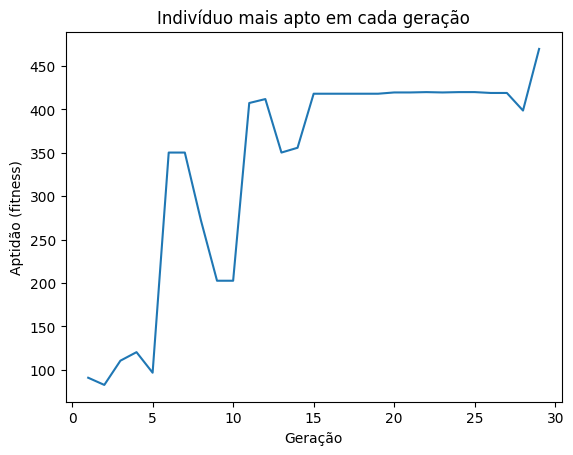

In [427]:
TOTAL_GENERATIONS = 1000
POPULATION_SIZE = 4
GENOTYPE_LENGTH = 10

current_generation = 1

# Inicialização dos componentes necessários
individual_constructor = IndividualConstructor(GENOTYPE_LENGTH)  # Fábrica de indivíduos
population_constructor = PopulationConstructor(individual_constructor)  # Fábrica de população
crossover = Crossover(individual_constructor)  # Operador de crossover
mutator = Mutator(individual_constructor)  # Mutador
mixer = Mixer(crossover, mutator)  # Criador de descendência
parent_selector = ParentSelector()  # Seletor de pais

# Criação do ambiente de evolução
environment = Environment(POPULATION_SIZE, parent_selector, population_constructor, mixer)

highest_fitness_list = []  # Lista para armazenar a aptidão mais alta de cada geração
while current_generation <= TOTAL_GENERATIONS:
    fittest = environment.best_fitness(1)[0]  # Obtém o indivíduo mais apto da população atual
    
    highest_fitness_list.append(fittest.fitness)  # Armazena a aptidão do indivíduo mais apto    
    
    #if "0" not in fittest.genotype:  # Verifica se encontrou a solução desejada
    #    print("Vencedor!")
    #    break

    if fittest.fitness >=450:  # Verifica se encontrou a solução desejada
        print("Vencedor.")
        break   
    
    environment.update()  # Atualiza a população para a próxima geração
    current_generation += 1

print("Meta: Chegar mais próximo possível de 500.")
print("Parou na geração " + str(current_generation - 1) + ". Indivíduo mais apto: "+str(fittest))
import matplotlib.pyplot as plt
generations = range(1, len(highest_fitness_list) + 1)
plt.plot(generations, highest_fitness_list)
plt.title('Indivíduo mais apto em cada geração')
plt.xlabel('Geração')
plt.ylabel('Aptidão (fitness)')